<a href="https://colab.research.google.com/github/21092004Goda/data_anal/blob/main/Lab_1_Computer_Vision_and_Pattern_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Лабораторная работа 1.**
#### *Сбор, визуализация и анализ данных по графу*

### **Выбор тематики научных публикаций и сбор**
В качестве тематики для анализа был выбрана область Computer Vision and Pattern Recognition *(CVPR)*. Данное направление является одним из наиболее динамично развивающихся в сфере искусственного интеллекта и машинного обучения, что обусловлено его широким практическим применением: от автономных транспортных систем и медицинской диагностики до обработки изображений и видеоаналитики.

### **Сбор данных о научных публикациях через arXiv API**

**Область:** *Computer Vision and Pattern Recognition*

**Источник:** [arxiv.org](https://arxiv.org/list/cs.CV/recent)


In [1]:
%%capture
!pip install feedparser


In [2]:
import feedparser
import urllib.request as libreq
import pandas as pd


In [3]:
# Параметры запроса
base_url = 'http://export.arxiv.org/api/query?'
search_query = 'cat:cs.CV'  # Категория: Computer Vision
start = 0                   # Начальный индекс
max_results = 200           # Количество результатов за запрос (максимум 2000)


In [4]:
# Формирование URL
url = f"{base_url}search_query={search_query}&start={start}&max_results={max_results}"


In [5]:
# Выполнение запроса и разбор ответа
with libreq.urlopen(url) as response:
    data = response.read()
feed = feedparser.parse(data)


In [6]:
# Извлечение нужных данных
articles = []
for entry in feed.entries:
    authors = ', '.join(author.name for author in entry.authors)
    tags = [tag['term'] for tag in entry.get('tags', [])]
    articles.append({
        'title': entry.title,
        'abstract': entry.summary,
        'authors': authors,
        'tags': ", ".join(tags),
        'published': entry.published,
        'arxiv_url': entry.link
    })



In [7]:
# Создание DataFrame
df = pd.DataFrame(articles)
print(df.shape)
df.head()

(200, 6)


,title,abstract,authors,tags,published,arxiv_url
0,A Linear Shift Invariant Multiscale Transform,This paper presents a multiscale decomposition...,Andreas Siebert,"cs.CV, I.4.3",1998-10-02T03:34:38Z,http://arxiv.org/abs/cs/9810003v1
1,General Theory of Image Normalization,"We give a systematic, abstract formulation of ...",Stephen L. Adler,"cs.CV, I.2.10, I.4.7, I.4.8",1998-10-19T20:46:16Z,http://arxiv.org/abs/cs/9810017v1
2,A Differential Invariant for Zooming,This paper presents an invariant under scaling...,Andreas Siebert,"cs.CV, I.4.7",1999-08-26T17:18:49Z,http://arxiv.org/abs/cs/9908017v1
3,A Parallel Algorithm for Dilated Contour Extra...,"We describe a simple, but efficient algorithm ...","B. R. Schlei, L. Prasad","cs.CV, I.2.10, D.1.3, G.1.2",2000-01-25T16:09:37Z,http://arxiv.org/abs/cs/0001024v1
4,Image Compression with Iterated Function Syste...,"Fractal image compression, Culik's image compr...","Oleg Kiselyov, Paul Fisher","cs.CV, I.4.2; I.4.10; G.1.2",2000-03-15T19:31:51Z,http://arxiv.org/abs/cs/0003065v1


### **Загрузка модели для извлечения ключевых слов с HuggingFace**

**Модель:** [HuggingFace](https://huggingface.co/ilsilfverskiold/tech-keywords-extractor)

In [8]:
# 2. Извлечение ключевых слов
from transformers import pipeline
from tqdm.auto import tqdm
import torch

print(torch.cuda.is_available())  # True = GPU доступен
print(torch.cuda.get_device_name(0))  # имя GPU

pipe = pipeline("text2text-generation", model="ilsilfverskiold/tech-keywords-extractor", device=0)

tqdm.pandas()
df["keywords"] = df["abstract"].progress_apply(lambda x: pipe(x)[0]["generated_text"].split(", "))

df.head()

True
Tesla T4


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/292 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

Device set to use cuda:0


  0%|          | 0/200 [00:00<?, ?it/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


,title,abstract,authors,tags,published,arxiv_url,keywords
0,A Linear Shift Invariant Multiscale Transform,This paper presents a multiscale decomposition...,Andreas Siebert,"cs.CV, I.4.3",1998-10-02T03:34:38Z,http://arxiv.org/abs/cs/9810003v1,"[Multiscale decomposition, Wavelet Transform, ..."
1,General Theory of Image Normalization,"We give a systematic, abstract formulation of ...",Stephen L. Adler,"cs.CV, I.2.10, I.4.7, I.4.8",1998-10-19T20:46:16Z,http://arxiv.org/abs/cs/9810017v1,"[Image Normalization, Algorithms, Planar Objects]"
2,A Differential Invariant for Zooming,This paper presents an invariant under scaling...,Andreas Siebert,"cs.CV, I.4.7",1999-08-26T17:18:49Z,http://arxiv.org/abs/cs/9908017v1,"[Rotationally Invariant, Gaussian Operators, S..."
3,A Parallel Algorithm for Dilated Contour Extra...,"We describe a simple, but efficient algorithm ...","B. R. Schlei, L. Prasad","cs.CV, I.2.10, D.1.3, G.1.2",2000-01-25T16:09:37Z,http://arxiv.org/abs/cs/0001024v1,"[Contour Extraction, Parallel Computer Code Ge..."
4,Image Compression with Iterated Function Syste...,"Fractal image compression, Culik's image compr...","Oleg Kiselyov, Paul Fisher","cs.CV, I.4.2; I.4.10; G.1.2",2000-03-15T19:31:51Z,http://arxiv.org/abs/cs/0003065v1,"[Culik's Image Compression, Wavelet Image Deco..."


In [9]:
# 3. Сохранение датасета
df.to_csv("cvpr_pubs.csv", index=False)

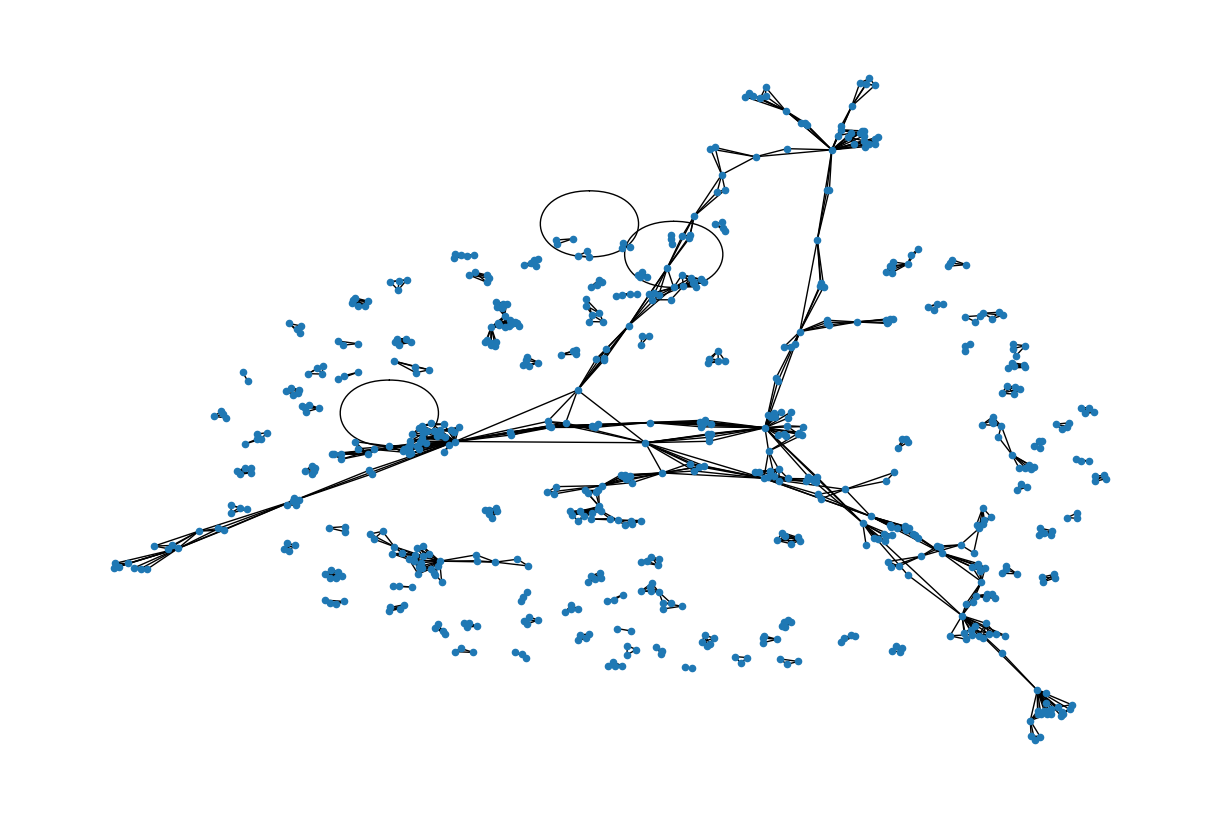

In [10]:
# 4. Построение графа по ключевым словам
import networkx as nx
from itertools import combinations, chain
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

klist = [[word.strip() for word in keywords if word] for keywords in df["keywords"].tolist()]
edges = list(chain(*[list(combinations(words, 2)) for words in klist if len(words) > 1]))
edges = [tuple(sorted(edge)) for edge in edges]
weighted_edges = [(edge[0], edge[1], {"weight": edges.count(edge)}) for edge in set(edges)]

G = nx.Graph()
G.add_edges_from(weighted_edges)

plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=False, node_size=20)
plt.show()


In [11]:
# 5. Кластеры (поиск сообществ)
communities = nx.community.louvain_communities(G, resolution=0.9)
print(f"Clusters: {len(communities)}")


Clusters: 101


In [12]:
# 6. Топовые узлы по центральности
from operator import itemgetter

for i, nodes in enumerate(communities[:3], start=1):
    s = G.subgraph(nodes)
    top_nodes = sorted(nx.degree_centrality(s).items(), key=itemgetter(1), reverse=True)[:5]
    print(f"Cluster {i}, top nodes: {top_nodes}")


Cluster 1, top nodes: [('Velocity Probability Distribution', 1.0), ('Aerial Video', 1.0), ('Vehicle Motion', 1.0), ('Traffic Bottlenecks', 1.0)]
Cluster 2, top nodes: [('Parametrized Curves', 1.0), ('Algebraic Fits', 1.0), ('Gradient Weighted Algorithm', 1.0), ('Radial Functional Models', 1.0), ('Cramer-Rao', 1.0)]
Cluster 3, top nodes: [('3D Reconstruction', 1.0), ('Histological Images', 1.0), ('Feature Space', 1.0), ('Mean Square', 1.0)]
